In [1]:
import os,sys
import numpy as np
import pandas as pd
import scanpy as sc
from scanpy import AnnData
sc.set_figure_params(figsize=(4,4))
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype']=42
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

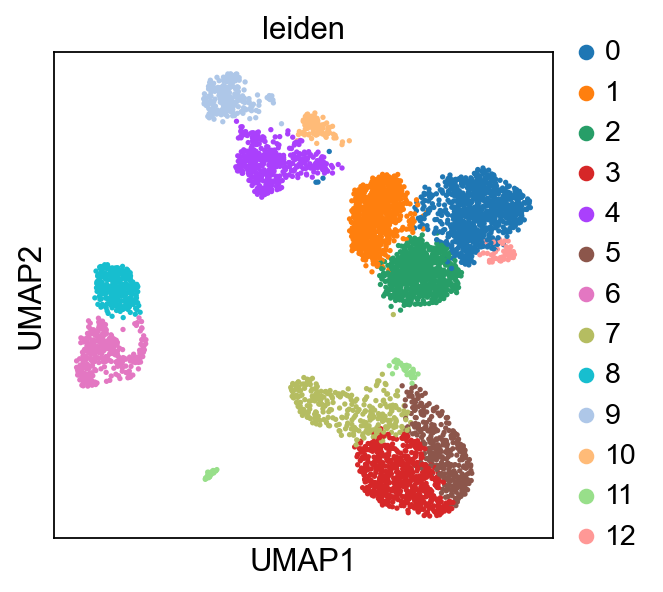

In [2]:
df=pd.read_csv('../DATA/gex_input_824_hvf.csv.gz').set_index('Unnamed: 0')
adata=AnnData(df)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata,color='leiden')

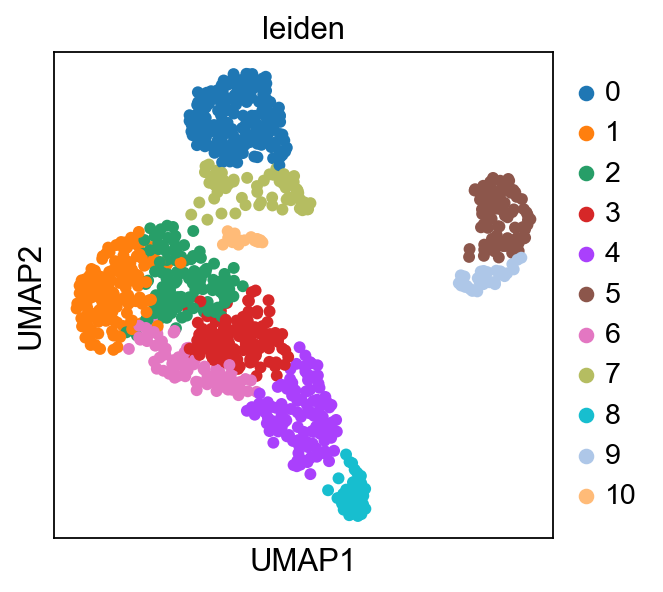

In [4]:
df=pd.read_csv('DATA/custom824_pred.csv.gz').set_index('Unnamed: 0')
imputed=AnnData(df)
sc.tl.pca(imputed)
sc.pp.neighbors(imputed)
sc.tl.leiden(imputed)
sc.tl.umap(imputed)
sc.pl.umap(imputed,color='leiden')

In [5]:
imputed.obs['raw_leiden']=adata.obs['leiden']
adata.obs['imputed_leiden']=imputed.obs['leiden']

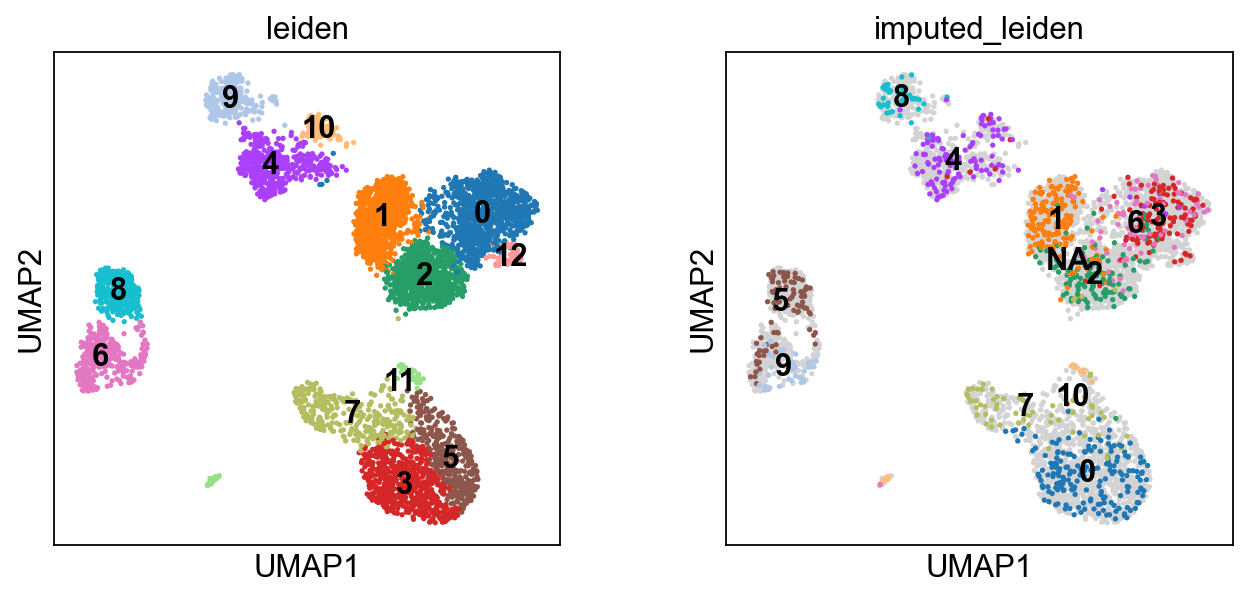

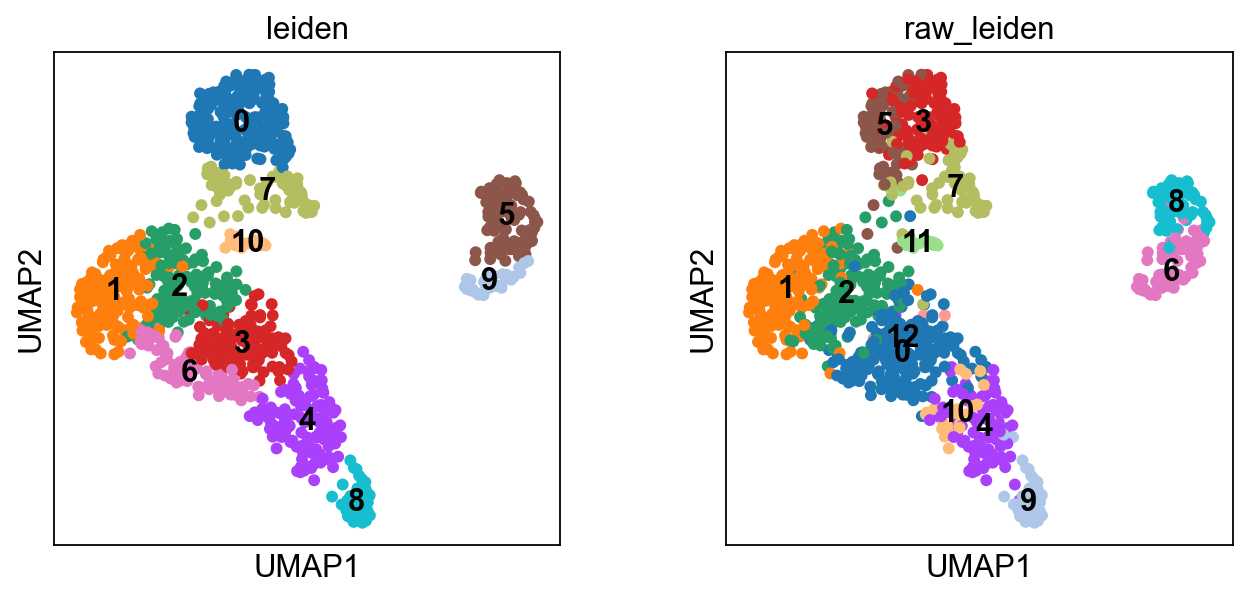

In [6]:
sc.pl.umap(adata,color=['leiden','imputed_leiden'],legend_loc='on data')
sc.pl.umap(imputed,color=['leiden','raw_leiden'],legend_loc='on data')

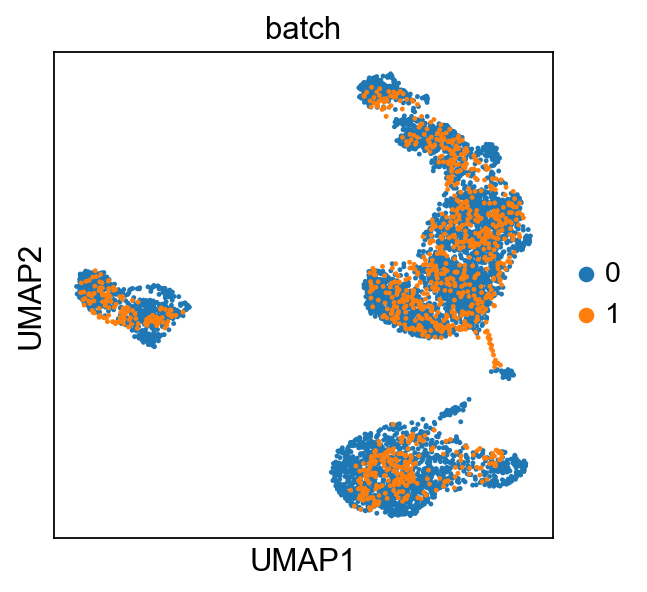

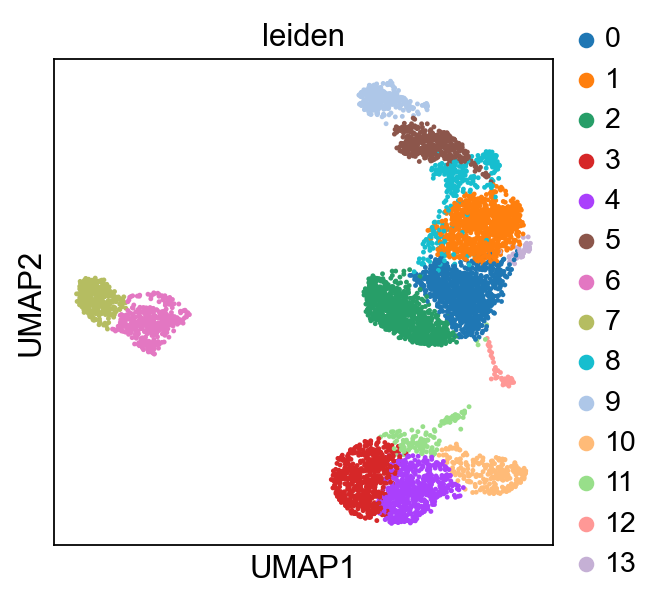

In [7]:
concat_ad=adata.concatenate(imputed)
sc.tl.pca(concat_ad)
sc.pp.neighbors(concat_ad)
sc.tl.leiden(concat_ad)
sc.tl.umap(concat_ad)
sc.pl.umap(concat_ad,color='batch')
sc.pl.umap(concat_ad,color='leiden')